In [1]:
# モジュールの導入
import numpy as np
from scipy.special import lambertw as LW
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import statistics

In [2]:
# ユークリッド距離を返す関数
def distance(Noise_x, Noise_y, POI_x, POI_y):
    return np.sqrt( (Noise_x - POI_x)**2 + ( Noise_y - POI_y)**2 )

In [3]:
# POI検索関数
def PointOfInterest(poi_true, poi_false, Num, real_data, POI_data,
                   zx_list, zy_list, zt_list, verocity):
    poi_true = 0
    poi_false = 0
    for i in range(Num):
        t_ = real_data[2] + zt_list[i] + (distance(zx_list[0][i], zy_list[0][i], 
                                      POI_data[0], POI_data[1]) / verocity )
        if ( POI_data[2] > t_ ):
            poi_true += 1
        else:
            poi_false += 1
    return poi_true, poi_false

In [4]:
# 入力データ
# 実際の時空間データ(位置(0,0), 12時に出発)
real_data = [0, 0, 12]

# POIデータ(位置(0,20), 17時に閉館)
"""
POI_data = [[4, 0,17],[8, 0,17],[12,0,17],
            [16,0,17],[20,0,17],[24,0,17],
            [28,0,17]]
"""
POI_True = [8,0,17]
POI_False = [24,0,17]
# 移動速度
verocity = 4.0

In [5]:
# ランダム化された点の分布の数
Num = 10000

In [6]:
# POI検索プログラムによる出力を表す変数
poi_true = 0
poi_false = 0

In [26]:
# POIの検索結果を格納するためのリスト
POI_result_list = []
POI_True_list = []
POI_False_list = []

# epsilonの値の定義
epsilon_z = [0.02, 0.04, 0.06,
             0.20, 0.40, 0.60,
             2.00, 3.00, 4.00,
             5.00, 10.0]
epsilon_t = []
for i in range(len(epsilon_z)):
    epsilon_t.append(epsilon_z[i] * verocity)

In [27]:
zx_list = []
zy_list = []
zt_list = []
FF_list_1_1 = []
FF_list_2_1 = []
FF_list_3_1 = []
FF_list_4_1 = []
FF_list_5_1 = []
FF_list_6_1 = []
FF_list_7_1 = []
FF_list_8_1 = []
FF_list_9_1 = []
FF_list_10_1 = []

In [28]:
# ノイズ生成
theta = np.random.uniform(0,2*np.pi,Num)

p_z = np.random.uniform(0,1,Num)
p_t = np.random.uniform(0,1,Num)

In [ ]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 10:1
            k = 10
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_10_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [30]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 9:1
            k = 9
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_9_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [31]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 8:1
            k = 8
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_8_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [32]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 7:1
            k = 7
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_7_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [33]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 6:1
            k = 6
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_6_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [34]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 5:1
            k = 5
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_5_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [35]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 4:1
            k = 4
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_4_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [36]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 3:1
            k = 3
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_3_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [37]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 2:1
            k = 2
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_2_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [38]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 1:1
            k = 1
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_False,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        FF_list_1_1.append(false_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [39]:
eps = []
for i in range(len(epsilon_z)):
    eps.append(epsilon_z[i]*5)

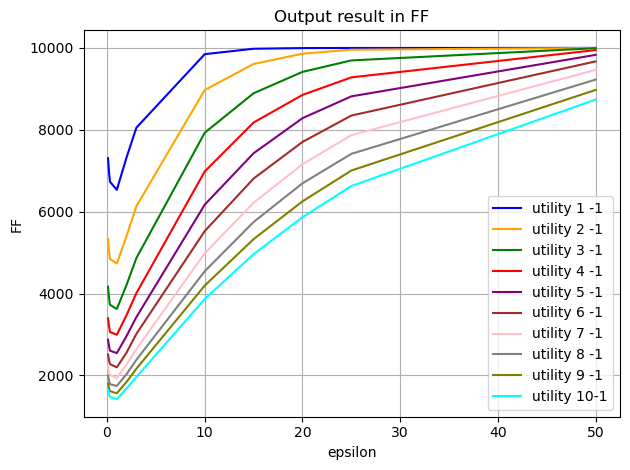

In [40]:
fig, ax = plt.subplots()

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 = "blue","orange","green","red","purple","brown","pink","gray","olive","cyan"# 各プロットの色
l1,l2,l3,l4,l5,l6,l7,l8,l9,l10 = "utility 1 -1","utility 2 -1","utility 3 -1","utility 4 -1","utility 5 -1","utility 6 -1","utility 7 -1","utility 8 -1","utility 9 -1","utility 10-1"# 各ラベル

ax.set_xlabel('epsilon')  # x軸ラベル
ax.set_ylabel('FF')  # y軸ラベル
ax.set_title(r'Output result in FF') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(eps, FF_list_1_1, color=c1, label=l1)
ax.plot(eps, FF_list_2_1, color=c2, label=l2)
ax.plot(eps, FF_list_3_1, color=c3, label=l3)
ax.plot(eps, FF_list_4_1, color=c4, label=l4)
ax.plot(eps, FF_list_5_1, color=c5, label=l5)
ax.plot(eps, FF_list_6_1, color=c6, label=l6)
ax.plot(eps, FF_list_7_1, color=c7, label=l7)
ax.plot(eps, FF_list_8_1, color=c8, label=l8)
ax.plot(eps, FF_list_9_1, color=c9, label=l9)
ax.plot(eps, FF_list_10_1, color=c10, label=l10)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig('Utility_FF_graphs.png') # 画像の保存
plt.show()

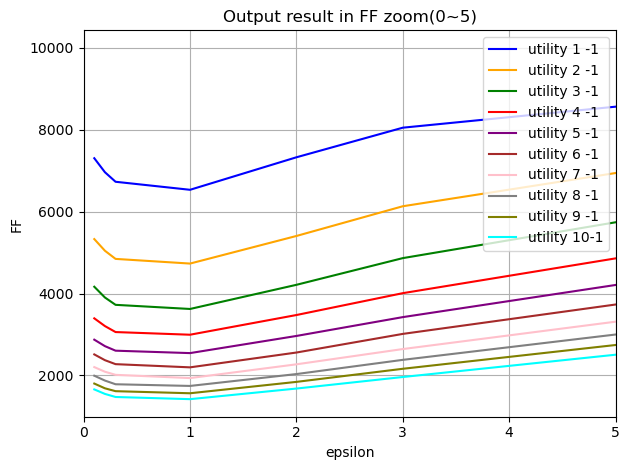

In [56]:
fig, ax = plt.subplots()

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 = "blue","orange","green","red","purple","brown","pink","gray","olive","cyan"# 各プロットの色
l1,l2,l3,l4,l5,l6,l7,l8,l9,l10 = "utility 1 -1","utility 2 -1","utility 3 -1","utility 4 -1","utility 5 -1","utility 6 -1","utility 7 -1","utility 8 -1","utility 9 -1","utility 10-1"# 各ラベル

ax.set_xlabel('epsilon')  # x軸ラベル
ax.set_ylabel('FF')  # y軸ラベル
ax.set_title(r'Output result in FF zoom(0~5)') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
ax.set_xlim([0, 5]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(eps, FF_list_1_1, color=c1, label=l1)
ax.plot(eps, FF_list_2_1, color=c2, label=l2)
ax.plot(eps, FF_list_3_1, color=c3, label=l3)
ax.plot(eps, FF_list_4_1, color=c4, label=l4)
ax.plot(eps, FF_list_5_1, color=c5, label=l5)
ax.plot(eps, FF_list_6_1, color=c6, label=l6)
ax.plot(eps, FF_list_7_1, color=c7, label=l7)
ax.plot(eps, FF_list_8_1, color=c8, label=l8)
ax.plot(eps, FF_list_9_1, color=c9, label=l9)
ax.plot(eps, FF_list_10_1, color=c10, label=l10)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig('Utility_FF_graphs_zoom.png') # 画像の保存
plt.show()

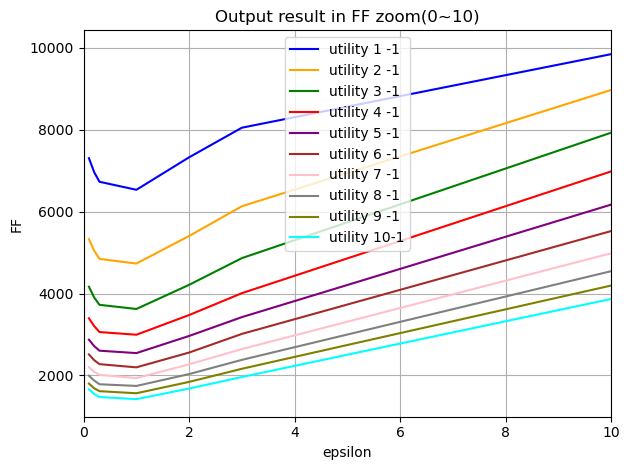

In [59]:
fig, ax = plt.subplots()

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 = "blue","orange","green","red","purple","brown","pink","gray","olive","cyan"# 各プロットの色
l1,l2,l3,l4,l5,l6,l7,l8,l9,l10 = "utility 1 -1","utility 2 -1","utility 3 -1","utility 4 -1","utility 5 -1","utility 6 -1","utility 7 -1","utility 8 -1","utility 9 -1","utility 10-1"# 各ラベル

ax.set_xlabel('epsilon')  # x軸ラベル
ax.set_ylabel('FF')  # y軸ラベル
ax.set_title(r'Output result in FF zoom(0~10)') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
ax.set_xlim([0, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(eps, FF_list_1_1, color=c1, label=l1)
ax.plot(eps, FF_list_2_1, color=c2, label=l2)
ax.plot(eps, FF_list_3_1, color=c3, label=l3)
ax.plot(eps, FF_list_4_1, color=c4, label=l4)
ax.plot(eps, FF_list_5_1, color=c5, label=l5)
ax.plot(eps, FF_list_6_1, color=c6, label=l6)
ax.plot(eps, FF_list_7_1, color=c7, label=l7)
ax.plot(eps, FF_list_8_1, color=c8, label=l8)
ax.plot(eps, FF_list_9_1, color=c9, label=l9)
ax.plot(eps, FF_list_10_1, color=c10, label=l10)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig('Utility_FF_graphs_zoom2.png') # 画像の保存
plt.show()

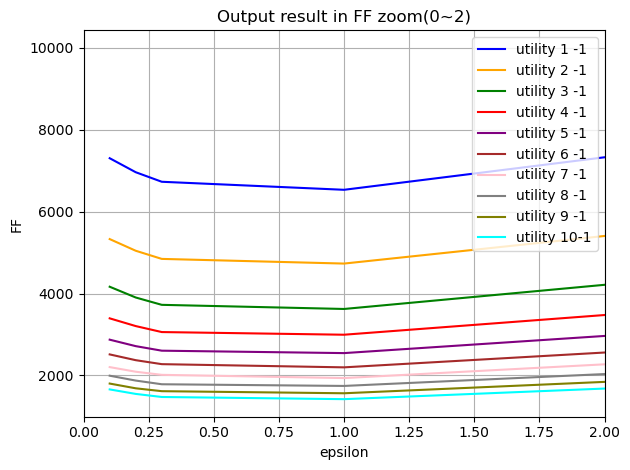

In [60]:
fig, ax = plt.subplots()

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 = "blue","orange","green","red","purple","brown","pink","gray","olive","cyan"# 各プロットの色
l1,l2,l3,l4,l5,l6,l7,l8,l9,l10 = "utility 1 -1","utility 2 -1","utility 3 -1","utility 4 -1","utility 5 -1","utility 6 -1","utility 7 -1","utility 8 -1","utility 9 -1","utility 10-1"# 各ラベル

ax.set_xlabel('epsilon')  # x軸ラベル
ax.set_ylabel('FF')  # y軸ラベル
ax.set_title(r'Output result in FF zoom(0~2)') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
ax.set_xlim([0, 2]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(eps, FF_list_1_1, color=c1, label=l1)
ax.plot(eps, FF_list_2_1, color=c2, label=l2)
ax.plot(eps, FF_list_3_1, color=c3, label=l3)
ax.plot(eps, FF_list_4_1, color=c4, label=l4)
ax.plot(eps, FF_list_5_1, color=c5, label=l5)
ax.plot(eps, FF_list_6_1, color=c6, label=l6)
ax.plot(eps, FF_list_7_1, color=c7, label=l7)
ax.plot(eps, FF_list_8_1, color=c8, label=l8)
ax.plot(eps, FF_list_9_1, color=c9, label=l9)
ax.plot(eps, FF_list_10_1, color=c10, label=l10)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig('Utility_FF_graphs_zoom3.png') # 画像の保存
plt.show()

In [41]:
TT_list_1_1 = []
TT_list_2_1 = []
TT_list_3_1 = []
TT_list_4_1 = []
TT_list_5_1 = []
TT_list_6_1 = []
TT_list_7_1 = []
TT_list_8_1 = []
TT_list_9_1 = []
TT_list_10_1 = []

In [42]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 10:1
            k = 10
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_10_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [43]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 9:1
            k = 9
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_9_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [44]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 8:1
            k = 8
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_8_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [45]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 7:1
            k = 7
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_7_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [46]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 6:1
            k = 6
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_6_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [47]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 5:1
            k = 5
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_5_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [48]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 4:1
            k = 4
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_4_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [49]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 3:1
            k = 3
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_3_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [50]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 2:1
            k = 2
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_2_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


In [51]:
for i in range(len(epsilon_z)):
    if epsilon_z[i] != 0:
        for l in range(100):
            W = LW( ((p_z - 1) / np.e), k = -1 )
            r = ( -1 / epsilon_z[i] ) * ( W + 1 )

            zx = real_data[0] + r * np.cos(theta)
            zx_list.append(np.array(zx))
            zy = real_data[1] + r * np.sin(theta)
            zy_list.append(np.array(zy))
            
            # EXノイズを付与 1:1
            k = 1
            poi_true = 0
            poi_false = 0
            for j in range(Num):
                if p_t[j] <= (k/(k+1)):
                    zt_list.append(((2*k)/epsilon_t[i]) * np.log(((k+1)*p_t[j])/k))
                else:
                    zt_list.append((2/epsilon_t[i]) * np.log( (1/((k+1)*(1-p_t[j]))) ) )
            POI_result_list.append(PointOfInterest(poi_true, poi_false, Num, real_data, POI_True,
                           zx_list, zy_list, zt_list, verocity))
            
            # ノイズを付与したリストの解放
            zx_list = []
            zy_list = []
            zt_list = []
            
        for m in range(100):
            POI_True_list.append(POI_result_list[m][0])
            POI_False_list.append(POI_result_list[m][1])
        true_mean = statistics.mean(POI_True_list)
        false_mean = statistics.mean(POI_False_list)
        TT_list_1_1.append(true_mean)
        
        # POIに関するリストの解放
        POI_result_list = []
        POI_True_list = []
        POI_False_list = []

print("done")

done


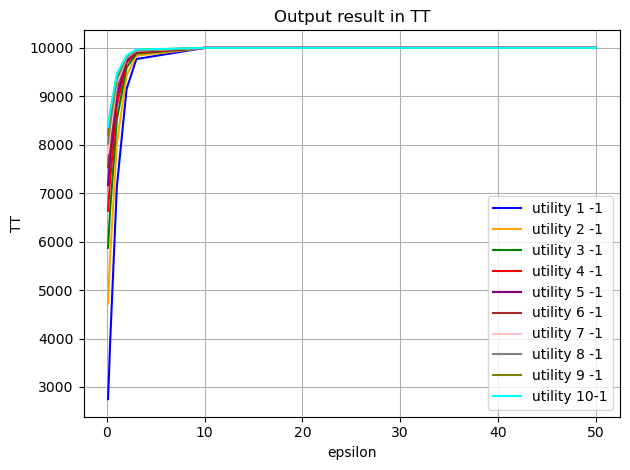

In [52]:
fig, ax = plt.subplots()

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 = "blue","orange","green","red","purple","brown","pink","gray","olive","cyan"# 各プロットの色
l1,l2,l3,l4,l5,l6,l7,l8,l9,l10 = "utility 1 -1","utility 2 -1","utility 3 -1","utility 4 -1","utility 5 -1","utility 6 -1","utility 7 -1","utility 8 -1","utility 9 -1","utility 10-1"# 各ラベル

ax.set_xlabel('epsilon')  # x軸ラベル
ax.set_ylabel('TT')  # y軸ラベル
ax.set_title(r'Output result in TT') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(eps, TT_list_1_1, color=c1, label=l1)
ax.plot(eps, TT_list_2_1, color=c2, label=l2)
ax.plot(eps, TT_list_3_1, color=c3, label=l3)
ax.plot(eps, TT_list_4_1, color=c4, label=l4)
ax.plot(eps, TT_list_5_1, color=c5, label=l5)
ax.plot(eps, TT_list_6_1, color=c6, label=l6)
ax.plot(eps, TT_list_7_1, color=c7, label=l7)
ax.plot(eps, TT_list_8_1, color=c8, label=l8)
ax.plot(eps, TT_list_9_1, color=c9, label=l9)
ax.plot(eps, TT_list_10_1, color=c10, label=l10)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig('Utility_TT_graphs.png') # 画像の保存
plt.show()

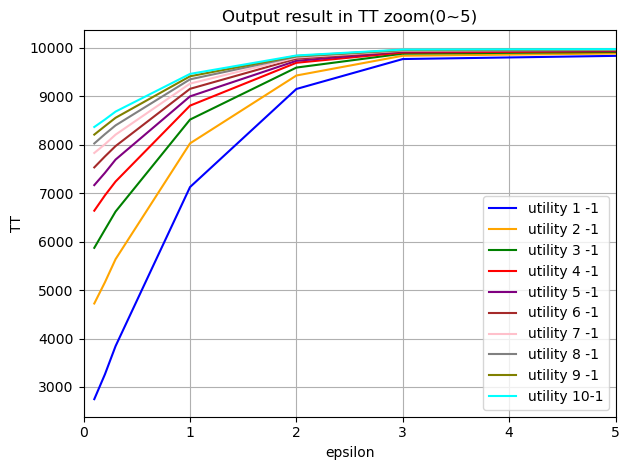

In [55]:
fig, ax = plt.subplots()

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 = "blue","orange","green","red","purple","brown","pink","gray","olive","cyan"# 各プロットの色
l1,l2,l3,l4,l5,l6,l7,l8,l9,l10 = "utility 1 -1","utility 2 -1","utility 3 -1","utility 4 -1","utility 5 -1","utility 6 -1","utility 7 -1","utility 8 -1","utility 9 -1","utility 10-1"# 各ラベル

ax.set_xlabel('epsilon')  # x軸ラベル
ax.set_ylabel('TT')  # y軸ラベル
ax.set_title(r'Output result in TT zoom(0~5)') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
ax.set_xlim([0, 5]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(eps, TT_list_1_1, color=c1, label=l1)
ax.plot(eps, TT_list_2_1, color=c2, label=l2)
ax.plot(eps, TT_list_3_1, color=c3, label=l3)
ax.plot(eps, TT_list_4_1, color=c4, label=l4)
ax.plot(eps, TT_list_5_1, color=c5, label=l5)
ax.plot(eps, TT_list_6_1, color=c6, label=l6)
ax.plot(eps, TT_list_7_1, color=c7, label=l7)
ax.plot(eps, TT_list_8_1, color=c8, label=l8)
ax.plot(eps, TT_list_9_1, color=c9, label=l9)
ax.plot(eps, TT_list_10_1, color=c10, label=l10)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig('Utility_TT_graphs_zoom.png') # 画像の保存
plt.show()